<a href="https://colab.research.google.com/github/yashvyas1405/helloworld/blob/master/AI_DOCK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")


In [197]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [198]:
train.shape

(38563, 9)

In [199]:
test.shape

(9641, 8)

-0.08683588462501615


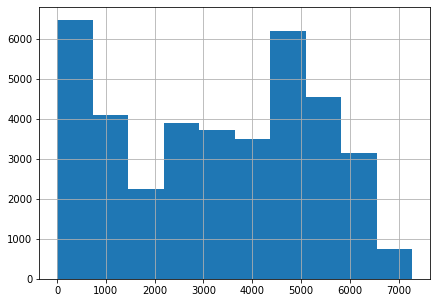

In [200]:
plt.rcParams["figure.figsize"] = 7,5
print(train["traffic_volume"].skew())
train["traffic_volume"].hist();

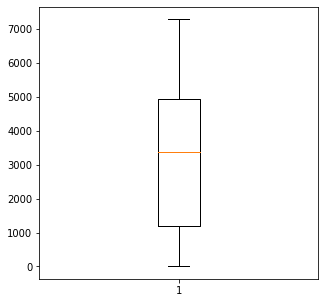

In [201]:
plt.rcParams["figure.figsize"] = 5,5
plt.boxplot(train["traffic_volume"]);

In [202]:
train_ind = train.drop("traffic_volume", axis = 1)
df = pd.concat([train_ind, test], axis = 0)

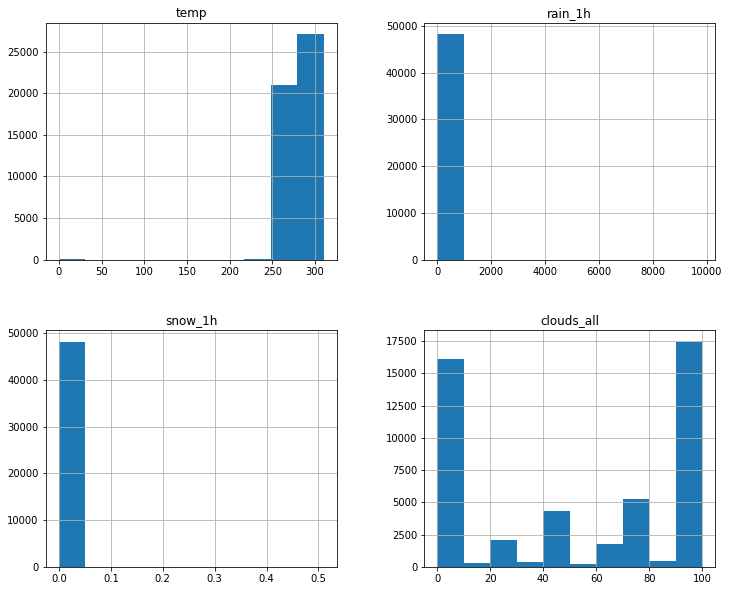

In [203]:
plt.rcParams["figure.figsize"] = 12,10
df.hist();

In [204]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231
std,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000
50%,282.450000,0.000000,0.000000,64.000000
75%,291.806000,0.000000,0.000000,90.000000
max,310.070000,9831.300000,0.510000,100.000000


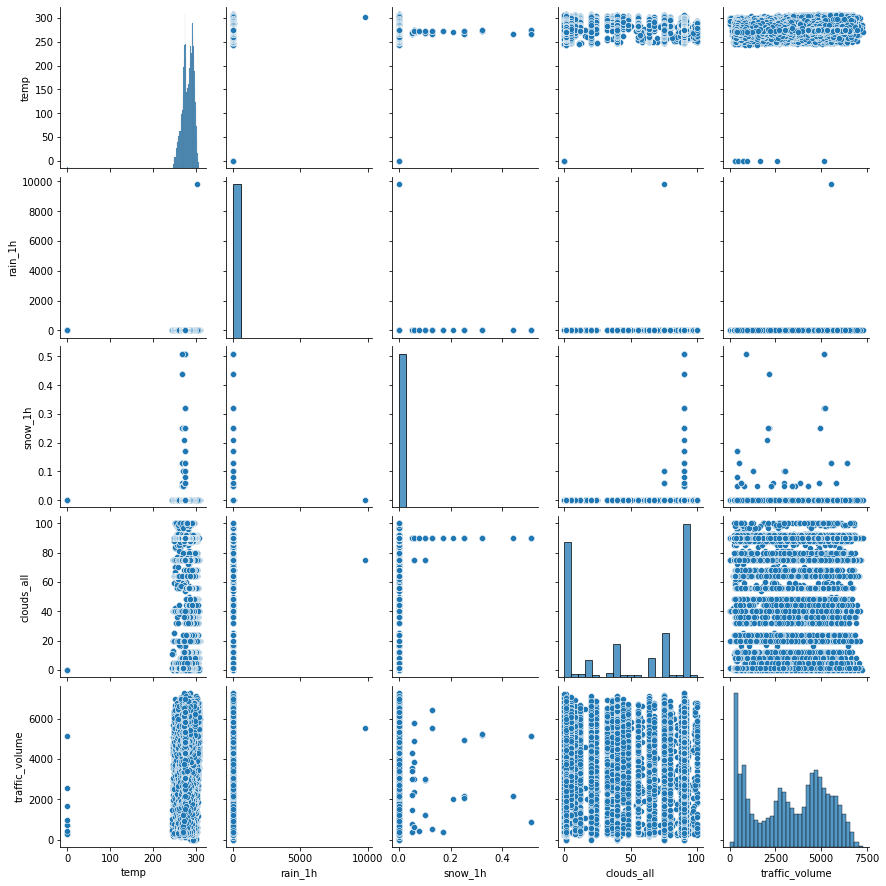

In [205]:
plt.rcParams["figure.figsize"] = 12,10
sns.pairplot(train);

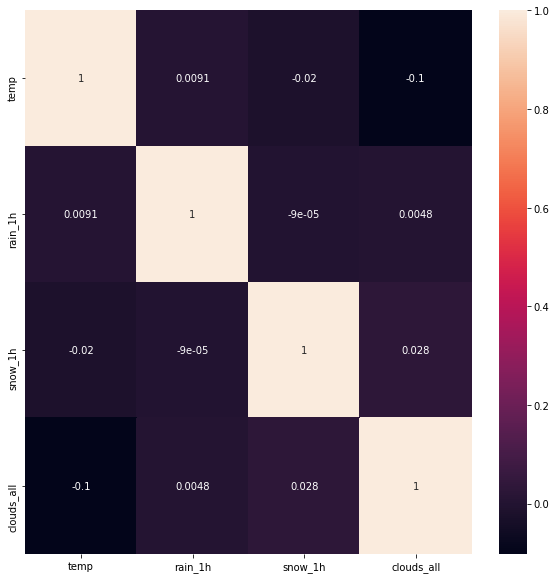

In [206]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True);

In [207]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48204 entries, 0 to 9640
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            48204 non-null  datetime64[ns]
 1   holiday              48204 non-null  object        
 2   temp                 48204 non-null  float64       
 3   rain_1h              48204 non-null  float64       
 4   snow_1h              48204 non-null  float64       
 5   clouds_all           48204 non-null  int64         
 6   weather_main         48204 non-null  object        
 7   weather_description  48204 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 3.3+ MB


In [209]:
df['Year'] = df['date_time'].dt.year
df['Month'] = df['date_time'].dt.month
df['Day'] = df['date_time'].dt.day
df['Hour'] = df['date_time'].dt.hour
df['Minutes'] = df['date_time'].dt.minute
df['Seconds'] = df['date_time'].dt.second

In [210]:
df.drop(['date_time'], axis = 1, inplace = True)

In [211]:
holi = pd.get_dummies(df.holiday, prefix = 'holiday', drop_first=True)
holi.head()

,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [212]:
main = pd.get_dummies(df.weather_main, prefix = 'weather_main', drop_first=True)
main.head()

,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [213]:
des = pd.get_dummies(df.weather_description, prefix = 'weather_des', drop_first=True)
des.head()

,weather_des_Sky is Clear,weather_des_broken clouds,weather_des_drizzle,weather_des_few clouds,weather_des_fog,weather_des_freezing rain,weather_des_haze,weather_des_heavy intensity drizzle,weather_des_heavy intensity rain,weather_des_heavy snow,weather_des_light intensity drizzle,weather_des_light intensity shower rain,weather_des_light rain,weather_des_light rain and snow,weather_des_light shower snow,weather_des_light snow,weather_des_mist,weather_des_moderate rain,weather_des_overcast clouds,weather_des_proximity shower rain,weather_des_proximity thunderstorm,weather_des_proximity thunderstorm with drizzle,weather_des_proximity thunderstorm with rain,weather_des_scattered clouds,weather_des_shower drizzle,weather_des_shower snow,weather_des_sky is clear,weather_des_sleet,weather_des_smoke,weather_des_snow,weather_des_thunderstorm,weather_des_thunderstorm with drizzle,weather_des_thunderstorm with heavy rain,weather_des_thunderstorm with light drizzle,weather_des_thunderstorm with light rain,weather_des_thunderstorm with rain,weather_des_very heavy rain
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [214]:
df_data = pd.concat([df, main, holi, des], axis = 1)

In [215]:
df_data.drop(['holiday', 'weather_main', 'weather_description'], axis = 1, inplace = True)
df_data.head()

,temp,rain_1h,snow_1h,clouds_all,Year,Month,Day,Hour,Minutes,Seconds,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_des_Sky is Clear,weather_des_broken clouds,weather_des_drizzle,weather_des_few clouds,weather_des_fog,weather_des_freezing rain,weather_des_haze,weather_des_heavy intensity drizzle,weather_des_heavy intensity rain,weather_des_heavy snow,weather_des_light intensity drizzle,weather_des_light intensity shower rain,weather_des_light rain,weather_des_light rain and snow,weather_des_light shower snow,weather_des_light snow,weather_des_mist,weather_des_moderate rain,weather_des_overcast clouds,weather_des_proximity shower rain,weather_des_proximity thunderstorm,weather_des_proximity thunderstorm with drizzle,weather_des_proximity thunderstorm with rain,weather_des_scattered clouds,weather_des_shower drizzle,weather_des_shower snow,weather_des_sky is clear,weather_des_sleet,weather_des_smoke,weather_des_snow,weather_des_thunderstorm,weather_des_thunderstorm with drizzle,weather_des_thunderstorm with heavy rain,weather_des_thunderstorm with light drizzle,weather_des_thunderstorm with light rain,weather_des_thunderstorm with rain,weather_des_very heavy rain
0,288.28,0.0,0.0,40,2012,10,2,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,75,2012,10,2,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,2012,10,2,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,2012,10,2,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,75,2012,10,2,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [216]:
data_train = df_data[:train.shape[0]]
data_test = df_data[train.shape[0]:].reset_index(drop = True)

In [217]:
data_train.head()

,temp,rain_1h,snow_1h,clouds_all,Year,Month,Day,Hour,Minutes,Seconds,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_des_Sky is Clear,weather_des_broken clouds,weather_des_drizzle,weather_des_few clouds,weather_des_fog,weather_des_freezing rain,weather_des_haze,weather_des_heavy intensity drizzle,weather_des_heavy intensity rain,weather_des_heavy snow,weather_des_light intensity drizzle,weather_des_light intensity shower rain,weather_des_light rain,weather_des_light rain and snow,weather_des_light shower snow,weather_des_light snow,weather_des_mist,weather_des_moderate rain,weather_des_overcast clouds,weather_des_proximity shower rain,weather_des_proximity thunderstorm,weather_des_proximity thunderstorm with drizzle,weather_des_proximity thunderstorm with rain,weather_des_scattered clouds,weather_des_shower drizzle,weather_des_shower snow,weather_des_sky is clear,weather_des_sleet,weather_des_smoke,weather_des_snow,weather_des_thunderstorm,weather_des_thunderstorm with drizzle,weather_des_thunderstorm with heavy rain,weather_des_thunderstorm with light drizzle,weather_des_thunderstorm with light rain,weather_des_thunderstorm with rain,weather_des_very heavy rain
0,288.28,0.0,0.0,40,2012,10,2,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,75,2012,10,2,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,2012,10,2,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,2012,10,2,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,75,2012,10,2,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [218]:
data_test.head()

,temp,rain_1h,snow_1h,clouds_all,Year,Month,Day,Hour,Minutes,Seconds,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_des_Sky is Clear,weather_des_broken clouds,weather_des_drizzle,weather_des_few clouds,weather_des_fog,weather_des_freezing rain,weather_des_haze,weather_des_heavy intensity drizzle,weather_des_heavy intensity rain,weather_des_heavy snow,weather_des_light intensity drizzle,weather_des_light intensity shower rain,weather_des_light rain,weather_des_light rain and snow,weather_des_light shower snow,weather_des_light snow,weather_des_mist,weather_des_moderate rain,weather_des_overcast clouds,weather_des_proximity shower rain,weather_des_proximity thunderstorm,weather_des_proximity thunderstorm with drizzle,weather_des_proximity thunderstorm with rain,weather_des_scattered clouds,weather_des_shower drizzle,weather_des_shower snow,weather_des_sky is clear,weather_des_sleet,weather_des_smoke,weather_des_snow,weather_des_thunderstorm,weather_des_thunderstorm with drizzle,weather_des_thunderstorm with heavy rain,weather_des_thunderstorm with light drizzle,weather_des_thunderstorm with light rain,weather_des_thunderstorm with rain,weather_des_very heavy rain
0,274.75,0.0,0.0,90,2017,11,1,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,274.75,0.0,0.0,90,2017,11,1,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,274.79,0.0,0.0,90,2017,11,1,21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,274.79,0.0,0.0,90,2017,11,1,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,275.08,0.0,0.0,90,2017,11,1,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [219]:
from sklearn.model_selection import train_test_split
X = data_train
Y = train["traffic_volume"]

In [220]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.30, random_state = 2020)

In [221]:
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit,cross_validate, StratifiedKFold,KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [222]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
pred_train = random_forest.predict(train_x)
print("Train RMSE = {0} ".format(np.sqrt(mean_squared_error((train_y),(pred_train)))))
pred_test = random_forest.predict(test_x)
print("Test RMSE = {0}".format(np.sqrt(mean_squared_error((test_y),(pred_test)))))

Train RMSE = 312.30853199229546 
Test RMSE = 844.8087379829113


In [223]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train_x, train_y)
pred_train = decision_tree.predict(train_x)
print("Train RMSE = {0} ".format(np.sqrt(mean_squared_error((train_y),(pred_train)))))
pred_test = decision_tree.predict(test_x)
print("Test RMSE = {0}".format(np.sqrt(mean_squared_error((test_y),(pred_test)))))

Train RMSE = 0.0 
Test RMSE = 1145.6227168530954


In [224]:
xgboost = XGBRegressor()
xgboost.fit(train_x, train_y)
pred_train = xgboost.predict(train_x)
print("Train RMSE = {0} ".format(np.sqrt(mean_squared_error((train_y),(pred_train)))))
pred_test = xgboost.predict(test_x)
print("Test RMSE = {0}".format(np.sqrt(mean_squared_error((test_y),(pred_test)))))

[13:52:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE = 904.8050362254593 
Test RMSE = 919.5352100574055


Hyperparameter tuning

In [225]:
#NUmber of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#number of levels in a tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#min nuber of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#min number od samples req at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [226]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [227]:
# Using 5 fold cross validation
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 10, scoring = 'neg_mean_squared_error', cv= 5, verbose = 2, random_state = 42, n_jobs = 1)

In [228]:
rf_random.fit(train_x, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  19.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 24.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [229]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [230]:
best_params = {'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [231]:
random_forest = RandomForestRegressor(**best_params)
random_forest.fit(train_x, train_y)
pred_train = random_forest.predict(train_x)
print("Train RMSE = {0} ".format(np.sqrt(mean_squared_error((train_y),(pred_train)))))
pred_test = random_forest.predict(test_x)
print("Test RMSE = {0}".format(np.sqrt(mean_squared_error((test_y),(pred_test)))))

Train RMSE = 441.9442500000465 
Test RMSE = 845.3972198589302


In [237]:
importances = pd.DataFrame({
    'feature':train_x.columns,
    'importance':np.round(random_forest.feature_importances_,3)
    })
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Hour,0.724
temp,0.103
Day,0.062
Month,0.034
clouds_all,0.021
Year,0.021
rain_1h,0.007
weather_main_Clouds,0.004
weather_des_sky is clear,0.002


In [241]:
err_rf = []
y_pred_tot_rf = []

# X = X[selected_col]

from sklearn.model_selection import StratifiedKFold

fold = KFold(n_splits=15, shuffle=True, random_state=100)
i = 1
for train_index, test_index in fold.split(X.values, Y.values):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = Y[train_index], Y[test_index]
    m = RandomForestRegressor(**best_params)
    m.fit(x_train, y_train)
    pred_y = m.predict(x_val)
    print(i, " err_XGB: ", np.sqrt(mean_squared_error(y_val, pred_y)))
    err_rf.append(np.sqrt(mean_squared_error(y_val, pred_y)))
    pred_test = m.predict(data_test)
    i = i + 1
    y_pred_tot_rf.append(pred_test)
    
print()    
print("RF Mean RMSE : ", np.mean(err_rf))

1  err_XGB:  796.6457274862138
2  err_XGB:  793.5445448509444
3  err_XGB:  815.1322151979754
4  err_XGB:  805.575886999874
5  err_XGB:  781.3854385699759
6  err_XGB:  805.0547864406426
7  err_XGB:  816.1413662902992
8  err_XGB:  774.3597309452682
9  err_XGB:  806.8877073978673
10  err_XGB:  793.6118538828455
11  err_XGB:  820.6758347367621
12  err_XGB:  792.2697866047026
13  err_XGB:  779.377563267207
14  err_XGB:  813.4420955700622
15  err_XGB:  811.6697289895347

RF Mean RMSE :  800.3849511486783


In [243]:
def RMSE(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

import time

features = X.columns

training_start_time = time.time()

max_iter = 10
folds = StratifiedKFold(n_splits = max_iter)
oofs = np.zeros(len(X))
test_preds = np.zeros(len(data_test))
actual_test_preds = np.zeros(len(test_x))



for fold_, (trn_idx, val_idx) in enumerate(folds.split(data_train, pd.qcut(Y, 10, labels=False, duplicates='drop'))):
    
    print(f'\n---- Fold {fold_} -----\n')
    
    fold_start_time = time.time()
    
    X_trn, y_trn = X.iloc[trn_idx][features], pd.Series(Y).iloc[trn_idx]
    X_val, y_val = X.iloc[val_idx][features], pd.Series(Y).iloc[val_idx]
    X_test = data_test[features]
    print(X_trn.shape[1], X_val.shape[1])
    

    clf = XGBRegressor(n_estimators = 1000,max_depth = 31, learning_rate = 0.15)
    _ = clf.fit(X_trn,(y_trn), eval_set = [(X_val, (y_val))], verbose=100, early_stopping_rounds=200, eval_metric='rmse')
    

    oofs[val_idx] = (clf.predict(X_val))
    current_test_pred = (clf.predict(X_test))
    test_preds += (clf.predict(X_test))/max_iter
    actual_test_preds += (clf.predict(test_x))/max_iter
    
    
    print(f'\n Fold {RMSE((y_val),(oofs[val_idx]))}')
    
    fold_end_time = time.time()
    total_fold_time = int(fold_end_time - fold_start_time)
    
    print(f"\n->-> Fold ran for {(total_fold_time)//60} minutes {(total_fold_time)%60} seconds")
    

print(f'\nOOF val score: {RMSE((pd.Series(Y)), (oofs))}')
training_end_time = time.time()
total_training_time = int(training_end_time - training_start_time)

print(f'\n->-> Total training time: {(total_training_time)//60} minutes {(total_training_time)%60} seconds')


---- Fold 0 -----

68 68
[15:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3303.53
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:1113.11
[200]	validation_0-rmse:1113.11
Stopping. Best iteration:
[78]	validation_0-rmse:1113.1


 Fold 1113.1018204457969

->-> Fold ran for 3 minutes 23 seconds

---- Fold 1 -----

68 68
[15:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3297.99
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:1176.66
[200]	validation_0-rmse:1176.65
Stopping. Best iteration:
[76]	validation_0-rmse:1176.62


 Fold 1176.620781760693

->-> Fold ran for 3 minutes 21 seconds

---- Fold 2 -----

68 68
[15:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fa

In [245]:
submission = pd.DataFrame()
submission["Value"] = test_preds #average of predictions
submission.to_csv("submission_final_.csv",index = True)
print("Submission is ready")

submission.head()

Submission is ready


,Value
0,2480.759216
1,2490.767166
2,2443.796844
3,2467.315796
4,1848.037964
